In [1]:
import scipy
import json
import numpy as np
import pandas as pd
import statsmodels.formula.api as sum
from statsmodels.formula.api import ols
from scipy.stats import f_oneway,mstats, levene, shapiro, friedmanchisquare, wilcoxon
import glob
import matplotlib.pyplot as plt

In [2]:
df_All = pd.DataFrame()
for idx,file in enumerate(sorted(glob.glob("data/*Menu.json"))):
    data = json.load(open(file))
    part = pd.DataFrame(data["trails"])
    # if "Panel" in file:
    #     part["menuType"] =1
    # if "Radial" in file:
    #     part["menuType"]=0
    # if "Dwell" in file:
    #     part["modality"]=0
    # if "Pinch" in file:
    #     part["modality"]=2
    # if "GazeButton" in file:
    #     part["modality"]=3
    part["userID"] = idx // 6

    df_All = pd.concat([df_All,part], ignore_index=True)

In [3]:
# calculate error rate per user for conditions
df_per_users = df_All.groupby("userID")

In [4]:
eval_grouping = df_All.groupby(['userID','menuType','modality'])["correctness"].mean().reset_index()
eval_grouping

,userID,menuType,modality,correctness
0,0,0,0,0.95
1,0,0,2,1.00
2,0,0,3,0.95
3,0,1,0,1.00
4,0,1,2,1.00
...,...,...,...,...
109,18,0,2,1.00
110,18,0,3,0.90
111,18,1,0,0.95
112,18,1,2,0.85


In [5]:
eval_grouping.groupby(['userID'])["correctness"].mean().reset_index()

,userID,correctness
0,0,0.975000
1,1,0.966667
2,2,0.991667
3,3,0.908333
4,4,0.966667
5,5,0.966667
6,6,0.950000
7,7,0.950000
8,8,0.966667
9,9,0.966667


## ErrorRates Per User

In [6]:
df_ER_perUser=pd.DataFrame(columns=["Dwell","controller","GazeButton","Radial","Panel","PD","PC","PGB","RD","RC","RGB"])
for k,v in df_per_users:
    dwell = v.loc[v["modality"]==0]
    cont = v.loc[v["modality"]==2]
    gb = v.loc[v["modality"]==3]
    rad = v.loc[v["menuType"]==0]
    pen = v.loc[v["menuType"]==1]
    _pd = v.loc[(v["menuType"]==1)&(v["modality"]==0)]
    _pc = v.loc[(v["menuType"]==1)&(v["modality"]==2)]
    _pgb = v.loc[(v["menuType"]==1)&(v["modality"]==3)]
    _rd = v.loc[(v["menuType"]==0)&(v["modality"]==0)]
    _rc = v.loc[(v["menuType"]==0)&(v["modality"]==2)]
    _rgb = v.loc[(v["menuType"]==0)&(v["modality"]==3)]
    
    row = [(len(dwell.loc[dwell["correctness"]==False]) / len(dwell)) * 100,
           (len(cont.loc[cont["correctness"]==False]) / len(cont)) * 100,
           (len(gb.loc[gb["correctness"]==False]) / len(gb)) * 100,
           (len(rad.loc[rad["correctness"]==False]) / len(rad)) * 100,
           (len(pen.loc[pen["correctness"]==False]) / len(pen)) * 100,
           
           (len(_pd.loc[_pd["correctness"]==False]) / len(_pd)) * 100,
           (len(_pc.loc[_pc["correctness"]==False]) / len(_pc)) * 100,
           (len(_pgb.loc[_pgb["correctness"]==False]) / len(_pgb)) * 100,
           (len(_rd.loc[_rd["correctness"]==False]) / len(_rd)) * 100,
           (len(_rc.loc[_rc["correctness"]==False]) / len(_rc)) * 100,
           (len(_rgb.loc[_rgb["correctness"]==False]) / len(_rgb)) * 100,
           ]
    df_ER_perUser.loc[len(df_ER_perUser)]=row

In [7]:
df_ER_perUser.head(1)

,Dwell,controller,GazeButton,Radial,Panel,PD,PC,PGB,RD,RC,RGB
0,2.5,0.0,5.0,3.333333,1.666667,0.0,0.0,5.0,5.0,0.0,5.0


## PLOTS

<Axes: >

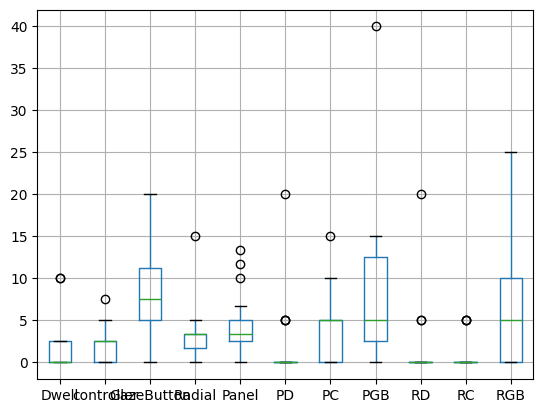

In [8]:
df_ER_perUser.boxplot()

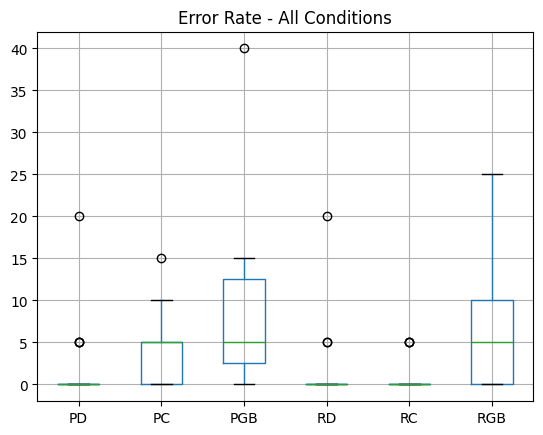

In [9]:
myfig=plt.figure()
plt.title("Error Rate - All Conditions")
df_ER_perUser.boxplot(column=["PD","PC","PGB","RD","RC","RGB"])
myfig.savefig("ER_conditions.svg", format="svg")
plt.show()

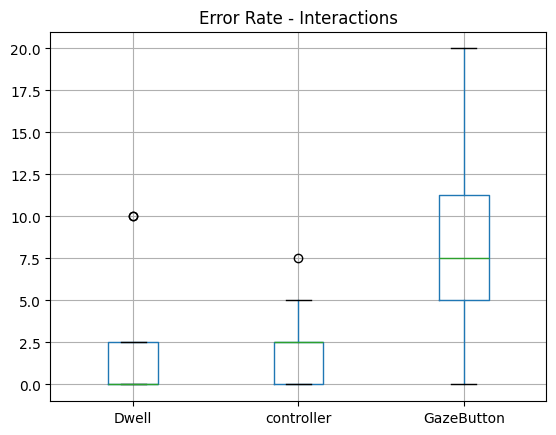

In [10]:
myfig=plt.figure()
plt.title("Error Rate - Interactions")
df_ER_perUser.boxplot(column=["Dwell","controller","GazeButton"])
myfig.savefig("ER_inter.svg", format="svg")
plt.show()

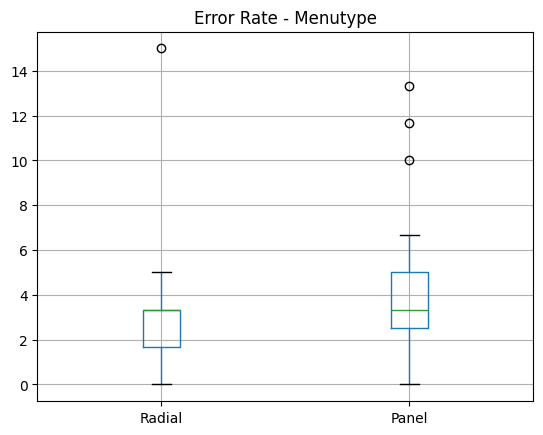

In [11]:
myfig=plt.figure()
plt.title("Error Rate - Menutype")
df_ER_perUser.boxplot(column=["Radial","Panel"])
myfig.savefig("ER_menu.svg", format="svg")
plt.show()

# Statistical Analysis

## Mean and Medians

In [12]:
print("Means")
print("Dwell: ", df_ER_perUser["Dwell"].mean(), " STD: ", df_ER_perUser["Dwell"].std())
print("Controller: ", df_ER_perUser["controller"].mean(), " STD: ", df_ER_perUser["controller"].std())
print("GazeButton: ", df_ER_perUser["GazeButton"].mean(), " STD: ", df_ER_perUser["GazeButton"].std())
print()
print("Radial: ", df_ER_perUser["Radial"].mean(), " STD: ", df_ER_perUser["Radial"].std())
print("Panel: ", df_ER_perUser["Panel"].mean(), " STD: ", df_ER_perUser["Panel"].std())
print()
print("medians")
print("Dwell: ", df_ER_perUser["Dwell"].median())
print("Controller: ", df_ER_perUser["controller"].median())
print("GazeButton: ", df_ER_perUser["GazeButton"].median())
print()
print("Radial: ", df_ER_perUser["Radial"].median())
print("Panel: ", df_ER_perUser["Panel"].median())

Means
Dwell:  1.7105263157894737  STD:  3.1239033163375205
Controller:  2.1052631578947367  STD:  1.9117977822546812
GazeButton:  7.7631578947368425  STD:  4.992684707128553

Radial:  3.0701754385964914  STD:  3.2519300012367225
Panel:  4.6491228070175445  STD:  3.5389781677392262

medians
Dwell:  0.0
Controller:  2.5
GazeButton:  7.5

Radial:  3.3333333333333335
Panel:  3.3333333333333335


In [13]:
df_ER_perUser.head(1)

,Dwell,controller,GazeButton,Radial,Panel,PD,PC,PGB,RD,RC,RGB
0,2.5,0.0,5.0,3.333333,1.666667,0.0,0.0,5.0,5.0,0.0,5.0


In [14]:
print("Means")
print("PD: ", df_ER_perUser["PD"].mean(), " STD: ", df_ER_perUser["PD"].std())
print("PC: ", df_ER_perUser["PC"].mean(), " STD: ", df_ER_perUser["PC"].std())
print("PGB: ", df_ER_perUser["PGB"].mean(), " STD: ", df_ER_perUser["PGB"].std())
print("RD: ", df_ER_perUser["RD"].mean(), " STD: ", df_ER_perUser["RD"].std())
print("RC: ", df_ER_perUser["RC"].mean(), " STD: ", df_ER_perUser["RC"].std())
print("RGB: ", df_ER_perUser["RGB"].mean(), " STD: ", df_ER_perUser["RGB"].std())

Means
PD:  1.8421052631578947  STD:  4.775669329409193
PC:  3.4210526315789473  STD:  4.100349435972015
PGB:  8.68421052631579  STD:  9.40480156078058
RD:  1.5789473684210527  STD:  4.729526514634586
RC:  0.7894736842105263  STD:  1.8731716231633877
RGB:  6.842105263157895  STD:  6.5001124596659166


## Check Normality for ANOVA

In [15]:
def check_normality(x):
    res = shapiro(x)
    
    res.statistic
    print(res.statistic, res.pvalue)
    if(res.pvalue<0.05):
        print("Sharpiro says Not normal")
    else:
        print("sharp hurray")
    return not(res.pvalue < 0.05)


def check_normality_all(conditions):
    results = []
    # Running the test for all unique pairs without repetition
    for (name_A, A) in conditions.items():
        result = check_normality(A.to_numpy())
        results.append(result)
        
    return results

conditions = {
    "Dwell": df_ER_perUser["Dwell"],
    "GazeButton": df_ER_perUser["GazeButton"],
    "Controller": df_ER_perUser["controller"],
}
print(check_normality_all(conditions))

conditions = {
    "List": df_ER_perUser["Panel"],
    "Pie": df_ER_perUser["Radial"],
}
print(check_normality_all(conditions))

conditions = {
    "List Dwell": df_ER_perUser["PD"],
    "List GazeButton": df_ER_perUser["PGB"],
    "List Controller": df_ER_perUser["PC"],
    "Pie Dwell": df_ER_perUser["RD"],
    "Pie GazeButton": df_ER_perUser["RGB"],
    "Pie Controller": df_ER_perUser["RC"],
}
print(check_normality_all(conditions))

0.5876693103687998 3.340057987108975e-06
Sharpiro says Not normal
0.9148132048813945 0.09076925265042793
sharp hurray
0.7674758135590538 0.000399680937430069
Sharpiro says Not normal
[False, True, False]
0.8473230478695912 0.006070208264981795
Sharpiro says Not normal
0.6641126446971162 2.1405523993502792e-05
Sharpiro says Not normal
[False, False]
0.4464937197352158 1.7430037193546815e-07
Sharpiro says Not normal
0.7705548140602054 0.00044013026061168377
Sharpiro says Not normal
0.7570962082784818 0.00029006729259141553
Sharpiro says Not normal
0.3886930707158167 5.964258927673763e-08
Sharpiro says Not normal
0.843333390020446 0.005235850856330806
Sharpiro says Not normal
0.4445961290337226 1.6808503620156116e-07
Sharpiro says Not normal
[False, False, False, False, False, False]


## Friedman tests

In [16]:
import pandas as pd
import pingouin as pg

# Reshape to 57x1 by stacking the columns, then reset index to add a userID column
df_long_interactions = df_ER_perUser[['Dwell', 'controller', 'GazeButton']].stack().reset_index()
df_long_interactions.columns = ['userID', 'interaction', 'ErrorRate']
df_long_interactions['userID'] += 1  # Adjust userID to start from 1

df_long_interactions.reset_index(drop=True, inplace=True)  # Drop the original multi-index for a clean new DataFrame
print(df_long_interactions)

pg.friedman(data=df_long_interactions, dv="ErrorRate", subject="userID", within="interaction", method='chisq')

    userID interaction  ErrorRate
0        1       Dwell        2.5
1        1  controller        0.0
2        1  GazeButton        5.0
3        2       Dwell        2.5
4        2  controller        0.0
5        2  GazeButton        7.5
6        3       Dwell        0.0
7        3  controller        2.5
8        3  GazeButton        0.0
9        4       Dwell       10.0
10       4  controller        2.5
11       4  GazeButton       15.0
12       5       Dwell        0.0
13       5  controller        0.0
14       5  GazeButton       10.0
15       6       Dwell        0.0
16       6  controller        2.5
17       6  GazeButton        7.5
18       7       Dwell        2.5
19       7  controller        0.0
20       7  GazeButton       12.5
21       8       Dwell        2.5
22       8  controller        0.0
23       8  GazeButton       12.5
24       9       Dwell        0.0
25       9  controller        2.5
26       9  GazeButton        7.5
27      10       Dwell        0.0
28      10  co

,Source,W,ddof1,Q,p-unc
Friedman,interaction,0.489993,2,18.619718,0.000091


In [17]:
df_long_combinations = df_ER_perUser[['PD', 'PC', 'PGB', 'RD', 'RC', 'RGB']].stack().reset_index()
df_long_combinations.columns = ['userID', 'combination', 'ErrorRate']
df_long_combinations['userID'] += 1  # Adjust userID to start from 1

df_long_combinations.reset_index(drop=True, inplace=True)  # Drop the original multi-index for a clean new DataFrame
print(df_long_combinations)

pg.friedman(data=df_long_combinations, dv="ErrorRate", subject="userID", within="combination", method='chisq')

     userID combination  ErrorRate
0         1          PD        0.0
1         1          PC        0.0
2         1         PGB        5.0
3         1          RD        5.0
4         1          RC        0.0
..      ...         ...        ...
109      19          PC       15.0
110      19         PGB       15.0
111      19          RD        0.0
112      19          RC        0.0
113      19         RGB       10.0

[114 rows x 3 columns]


,Source,W,ddof1,Q,p-unc
Friedman,combination,0.321932,5,30.583501,0.000011


## Wilcoxon post-hoc tests

In [18]:
import stateval

conditions = {
    "List Dwell": df_ER_perUser["PD"],
    "List GazeButton": df_ER_perUser["PGB"],
    "List Controller": df_ER_perUser["PC"],
    "Pie Dwell": df_ER_perUser["RD"],
    "Pie GazeButton": df_ER_perUser["RGB"],
    "Pie Controller": df_ER_perUser["RC"],
}

results_combinations, p_vals_combinations, effect_sizes_combinations = stateval.compare_all(conditions, posthoc_test=stateval.posthoc_wilcoxon)
print(results_combinations)
print(p_vals_combinations)
print(effect_sizes_combinations)

# Converting results to a DataFrame for a structured display
import pandas as pd
results_df = pd.DataFrame(results_combinations)
results_df

[{'Pair': 'List Dwell vs List GazeButton', 'Statistic': np.float64(9.0), 'P-value': np.float64(0.006192503147363882), 'Effect Size': np.float64(-0.8285714285714285)}, {'Pair': 'List Dwell vs List Controller', 'Statistic': np.float64(24.0), 'P-value': np.float64(0.12158846348776642), 'Effect Size': np.float64(-0.47252747252747257)}, {'Pair': 'List Dwell vs Pie Dwell', 'Statistic': np.float64(12.5), 'P-value': np.float64(0.8604904229558006), 'Effect Size': np.float64(0.10714285714285715)}, {'Pair': 'List Dwell vs Pie GazeButton', 'Statistic': np.float64(13.0), 'P-value': np.float64(0.012716250355070739), 'Effect Size': np.float64(-0.7523809523809524)}, {'Pair': 'List Dwell vs Pie Controller', 'Statistic': np.float64(6.0), 'P-value': np.float64(0.37406279749088245), 'Effect Size': np.float64(0.4285714285714286)}, {'Pair': 'List GazeButton vs List Controller', 'Statistic': np.float64(16.5), 'P-value': np.float64(0.044141991911029424), 'Effect Size': np.float64(0.6373626373626373)}, {'Pair'

,Pair,Statistic,P-value,Effect Size
0,List Dwell vs List GazeButton,9.0,0.006193,-0.828571
1,List Dwell vs List Controller,24.0,0.121588,-0.472527
2,List Dwell vs Pie Dwell,12.5,0.860490,0.107143
3,List Dwell vs Pie GazeButton,13.0,0.012716,-0.752381
4,List Dwell vs Pie Controller,6.0,0.374063,0.428571
5,List GazeButton vs List Controller,16.5,0.044142,0.637363
6,List GazeButton vs Pie Dwell,10.5,0.014831,0.769231
7,List GazeButton vs Pie GazeButton,53.0,0.708034,0.116667
8,List GazeButton vs Pie Controller,4.0,0.001386,0.933333
9,List Controller vs Pie Dwell,21.5,0.161408,0.448718


In [19]:
conditions = {
    "List": df_ER_perUser["Panel"],
    "Pie": df_ER_perUser["Radial"],
}
results_layouts, p_vals_layouts, effect_sizes_layouts = stateval.compare_all(conditions)
print(results_layouts)
print(p_vals_layouts)
print(effect_sizes_layouts)

[{'Pair': 'List vs Pie', 'Statistic': np.float64(31.0), 'P-value': np.float64(0.10375575494448909), 'Effect Size': np.float64(0.48333333333333334)}]
[0.10375575]
[0.48333333]


In [20]:
conditions = {
    "Dwell": df_ER_perUser["Dwell"],
    "GazeButton": df_ER_perUser["GazeButton"],
    "Controller": df_ER_perUser["controller"],
}

results_interactions, p_vals_interactions, effect_sizes_interactions = stateval.compare_all(conditions)
print(results_interactions)
print(p_vals_interactions)
print(effect_sizes_interactions)

[{'Pair': 'Dwell vs GazeButton', 'Statistic': np.float64(5.5), 'P-value': np.float64(0.0007140983169060778), 'Effect Size': np.float64(-0.9281045751633987)}, {'Pair': 'Dwell vs Controller', 'Statistic': np.float64(61.0), 'P-value': np.float64(0.4535368062287073), 'Effect Size': np.float64(-0.20261437908496727)}, {'Pair': 'GazeButton vs Controller', 'Statistic': np.float64(7.0), 'P-value': np.float64(0.000610012137735103), 'Effect Size': np.float64(0.9181286549707601)}]
[0.0007141  0.45353681 0.00061001]
[-0.92810458 -0.20261438  0.91812865]


In [21]:
p_vals = np.concatenate((p_vals_layouts, p_vals_interactions, p_vals_combinations))
p_vals

array([1.03755755e-01, 7.14098317e-04, 4.53536806e-01, 6.10012138e-04,
       6.19250315e-03, 1.21588463e-01, 8.60490423e-01, 1.27162504e-02,
       3.74062797e-01, 4.41419919e-02, 1.48312068e-02, 7.08033635e-01,
       1.38557534e-03, 1.61408133e-01, 4.24988381e-02, 4.25589652e-02,
       2.64921208e-03, 8.24140896e-01, 2.88068390e-03])

In [22]:
from statsmodels.stats.multitest import multipletests

a,b,c,d = multipletests(p_vals, alpha=0.05, method='holm', maxiter=1, is_sorted=False, returnsorted=False)
print(np.sum(a), np.sum(~a), a)

5 14 [False  True False  True False False False False False False False False
  True False False False  True False  True]


## Revise dataset for plotting

In [23]:
df_ER_perUser.head()

,Dwell,controller,GazeButton,Radial,Panel,PD,PC,PGB,RD,RC,RGB
0,2.5,0.0,5.0,3.333333,1.666667,0.0,0.0,5.0,5.0,0.0,5.0
1,2.5,0.0,7.5,1.666667,5.000000,0.0,0.0,15.0,5.0,0.0,0.0
2,0.0,2.5,0.0,0.000000,1.666667,0.0,5.0,0.0,0.0,0.0,0.0
3,10.0,2.5,15.0,15.000000,3.333333,0.0,5.0,5.0,20.0,0.0,25.0
4,0.0,0.0,10.0,1.666667,5.000000,0.0,0.0,15.0,0.0,0.0,5.0


In [24]:
df_long_combinations.head()

,userID,combination,ErrorRate
0,1,PD,0.0
1,1,PC,0.0
2,1,PGB,5.0
3,1,RD,5.0
4,1,RC,0.0


In [25]:
df_long_combinations['layout'] = df_long_combinations['combination'].str[0]
df_long_combinations['interaction'] = df_long_combinations['combination'].str[1:]

In [26]:
df_long_combinations.head()

,userID,combination,ErrorRate,layout,interaction
0,1,PD,0.0,P,D
1,1,PC,0.0,P,C
2,1,PGB,5.0,P,GB
3,1,RD,5.0,R,D
4,1,RC,0.0,R,C


In [27]:
# Define mappings for IDs to letters
layout_mapping = {'R': 'Pie', 'P': 'List'}
interaction_mapping = {'D': 'Gaze-only', 'C': 'Controller-only', 'GB': 'Gaze-and-Controller'}
combination_mapping = {'RD': 'Pie & Gaze-only', 'RC': 'Pie & Controller-only', 'RGB': 'Pie & Gaze-and-Controller',
                        'PD': 'List & Gaze-only', 'PC': 'List & Controller-only', 'PGB': 'List & Gaze-and-Controller'}

df_long_combinations['interaction'] = df_long_combinations['interaction'].map(interaction_mapping)
df_long_combinations['layout'] = df_long_combinations['layout'].map(layout_mapping)
df_long_combinations['combination'] = df_long_combinations['combination'].map(combination_mapping)

In [28]:
df_long_combinations.head()

,userID,combination,ErrorRate,layout,interaction
0,1,List & Gaze-only,0.0,List,Gaze-only
1,1,List & Controller-only,0.0,List,Controller-only
2,1,List & Gaze-and-Controller,5.0,List,Gaze-and-Controller
3,1,Pie & Gaze-only,5.0,Pie,Gaze-only
4,1,Pie & Controller-only,0.0,Pie,Controller-only


## Plots

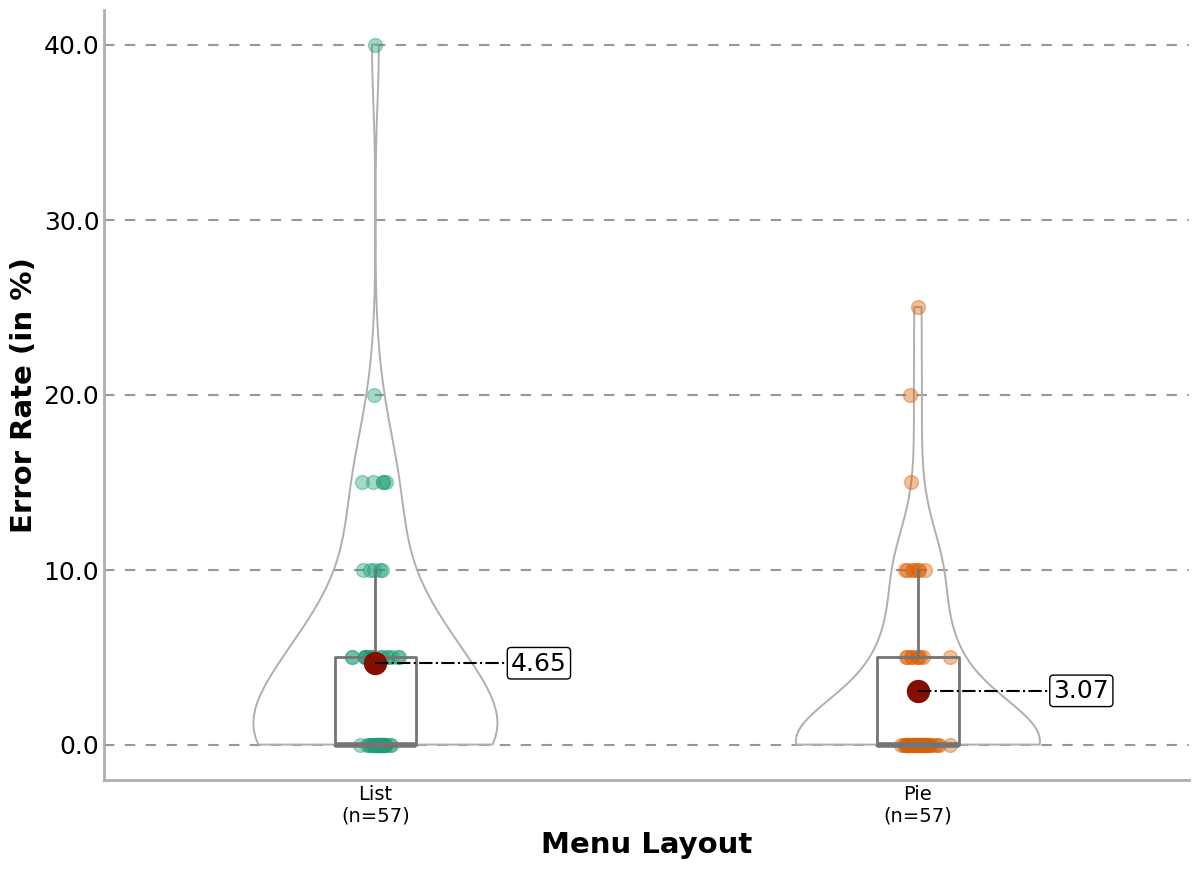

In [29]:
# Get the species, sorted alphabetically
species = sorted(df_long_combinations["layout"].unique())

# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [df_long_combinations[df_long_combinations["layout"] == specie]["ErrorRate"].values for specie in species]

xlabel = "Menu Layout"
ylabel = "Error Rate (in %)"

stateval.make_plot(y_data, species, xlabel, ylabel, save_figure_as="plots/error-rate-layouts.png")

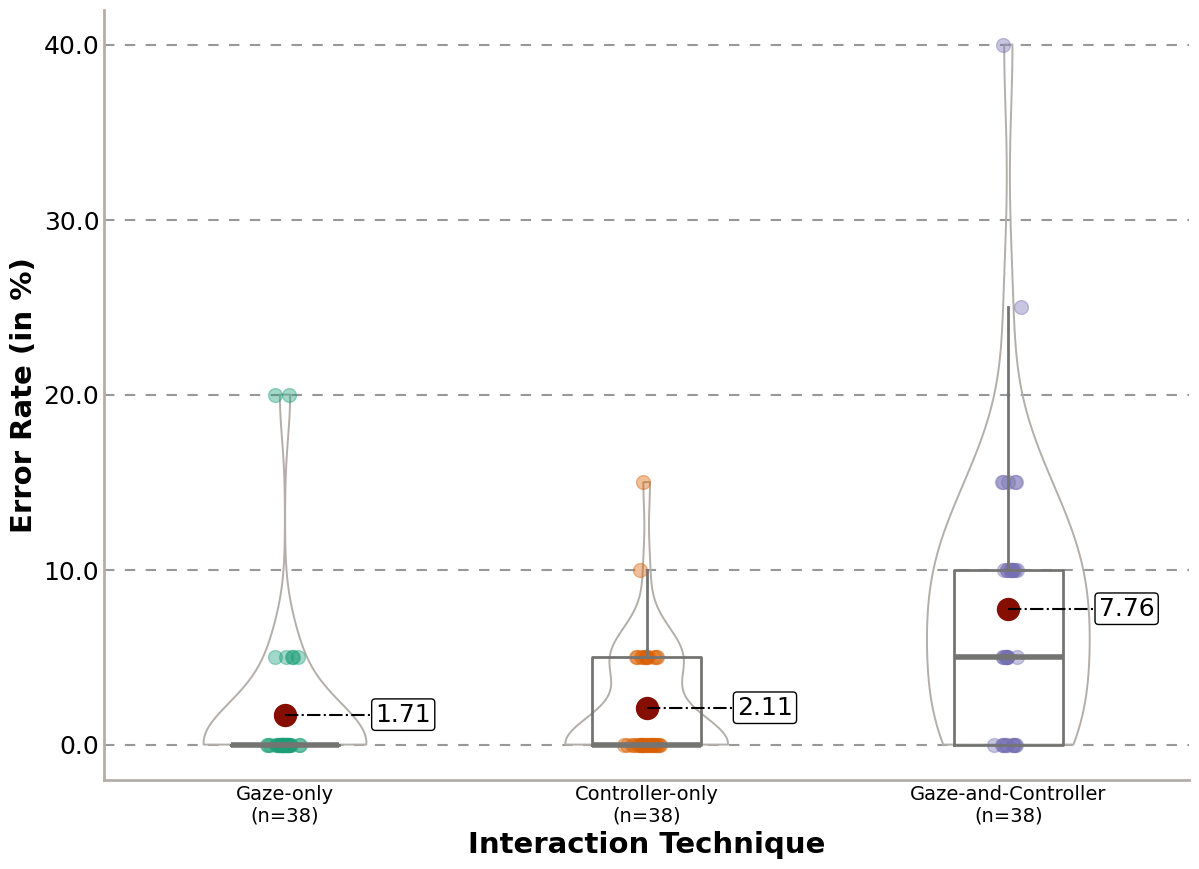

In [30]:
# Get the species, sorted alphabetically
species = (df_long_combinations["interaction"].unique())

# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [df_long_combinations[df_long_combinations["interaction"] == specie]["ErrorRate"].values for specie in species]

xlabel = "Interaction Technique"
ylabel = "Error Rate (in %)"

stateval.make_plot(y_data, species, xlabel, ylabel, save_figure_as="plots/error-rate-interaction.png")

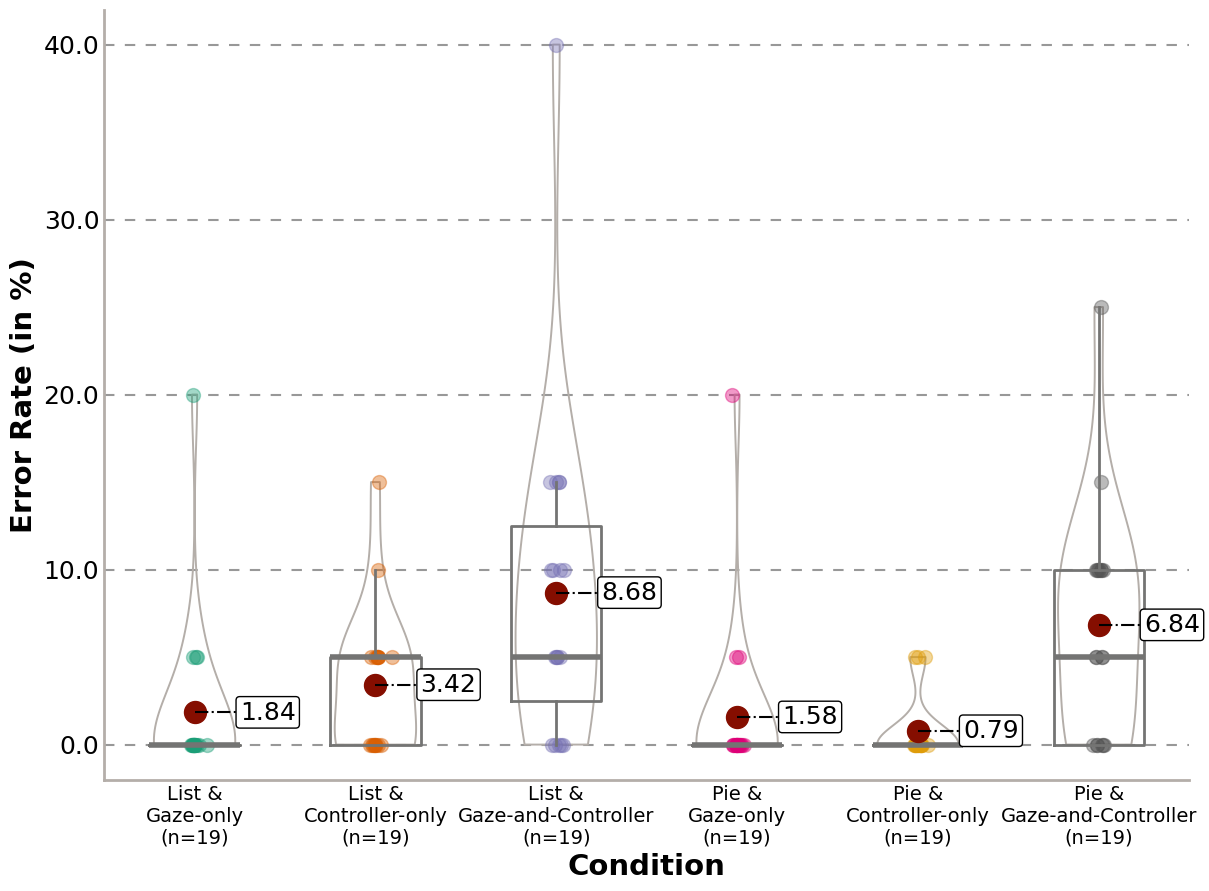

In [31]:
# Get the species, sorted alphabetically
species = (df_long_combinations["combination"].unique())

# y_data is a list of length 3 containing the bill_length_mm values for each specie 
y_data = [df_long_combinations[df_long_combinations["combination"] == specie]["ErrorRate"].values for specie in species]

xlabel = "Condition"
ylabel = "Error Rate (in %)"

stateval.make_plot(y_data, species, xlabel, ylabel, save_figure_as="plots/error-rate-combinations.png")